<a href="https://colab.research.google.com/github/crisubianca/RN-2022/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
print(x)
print(x.ndim)

[[1 2 3]
 [4 5 6]]
2


In [72]:
from keras.datasets import mnist
(train,train_labels), (test,test_labels) = mnist.load_data()
print(train.shape)

(60000, 28, 28)


In [73]:
batch = train[:128]
batch.shape

(128, 28, 28)

In [74]:
batch = train[:128,: ,: ]
batch.shape

(128, 28, 28)

In [75]:
all((train[:128,: ,: ] == train[:128]).reshape(-1))

True

In [76]:
import keras
from keras.datasets import mnist

In [77]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#print the shapes of the training dataset. Just for checking.
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [78]:
from keras import models
from keras import layers

In [79]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [80]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [81]:
network.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)

In [82]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [83]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [84]:
history = network.fit(train_images, train_labels,
        validation_data=(test_images, test_labels),
        epochs=10,
        batch_size=128
)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2557 - accuracy: 0.9262 - val_loss: 0.1337 - val_accuracy: 0.9591
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1049 - accuracy: 0.9688 - val_loss: 0.0986 - val_accuracy: 0.9706
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0681 - accuracy: 0.9800 - val_loss: 0.0765 - val_accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0727 - val_accuracy: 0.9787
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0673 - val_accuracy: 0.9798
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0292 - accuracy: 0.9916 - val_loss: 0.0789 - val_accuracy: 0.9783
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0720 - val_accuracy: 0.9790
Epoch 

In [85]:
history.history

{'loss': [0.25574633479118347,
  0.1049007922410965,
  0.06814030557870865,
  0.05046897754073143,
  0.03789125755429268,
  0.029192868620157242,
  0.021935798227787018,
  0.016849439591169357,
  0.012972506694495678,
  0.01022044476121664],
 'accuracy': [0.9261666536331177,
  0.968833327293396,
  0.9799500107765198,
  0.9846833348274231,
  0.9885666370391846,
  0.991599977016449,
  0.9933833479881287,
  0.9950500130653381,
  0.9964166879653931,
  0.9972833395004272],
 'val_loss': [0.13368766009807587,
  0.0985637679696083,
  0.07645025104284286,
  0.07267928123474121,
  0.06728310883045197,
  0.07892228662967682,
  0.07201072573661804,
  0.07135652005672455,
  0.0704369768500328,
  0.0730193555355072],
 'val_accuracy': [0.9591000080108643,
  0.9706000089645386,
  0.9768999814987183,
  0.9786999821662903,
  0.9797999858856201,
  0.9782999753952026,
  0.9789999723434448,
  0.9818999767303467,
  0.9818999767303467,
  0.9807999730110168]}

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

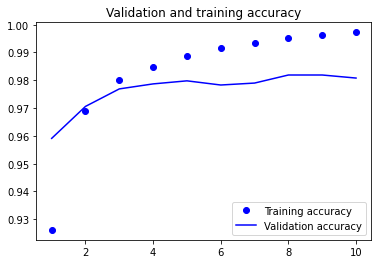

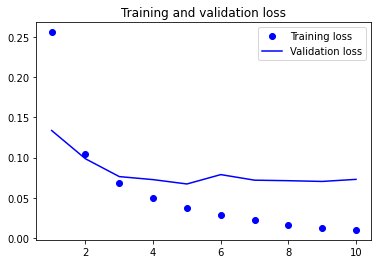

In [89]:
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Validation and training accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()